# 858.5 Drum Machine Synthesis

Encoding samples of the Roland 808 and 909 drum machines and interpolate them together to create a combined representation of their timbres, tonality, change over time, and resulting audio signal.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from magenta.models.nsynth import utils
from magenta.models.nsynth.wavenet import fastgen
from IPython.display import Audio
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'

/Users/t33kt33k/anaconda3/envs/py3k/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


All audio samples will first need to be encoded with a pre-trained WaveNet model. This will return  a 125 x 16 dimension encoding for every 4 seconds of audio which we can then decode/resynthesize.

In [3]:
def load_encoding(fname, sample_length=None, sr=16000, ckpt='model.ckpt-200000'):
    audio = utils.load_audio(fname, sample_length=sample_length, sr=sr)
    encoding = fastgen.encode(audio, ckpt, sample_length)
    return audio, encoding

## Drum Machine Interpolation and Resynthesis

We start with two sample banks of single hit samples from each of the drum machines. We will interpolate each drum machine's drum together and then save the generate output to a wav file.

We start out with the snare drum sample from both the 808 and the 909. We will encode both drum machine snare samples and then create an `enc_mix` where we combine the two samples and take the average.

In [4]:
sr = 16000
sample_length = 32000
aud1, enc1 = load_encoding('808/808snare.wav', sample_length)
aud2, enc2 = load_encoding('909/909snare.wav', sample_length)
enc_mix = (enc1 + enc2) / 2.0

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Restoring parameters from model.ckpt-200000


Let's look at the embedding forms of both the 808 (Encoding 1) and the 909 (Encoding 2). Then we will also look at what the combination would look like.

Text(0.5,1,'Average')

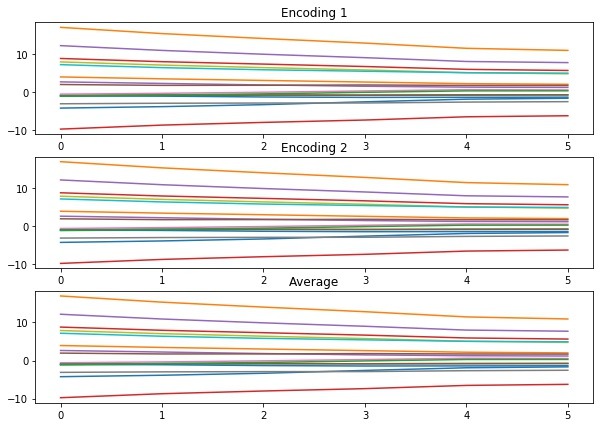

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(enc_mix[0]);
axs[2].set_title('Average')

In [51]:
Next we will decode our interpolated embeddings using Nsyth's' `fastgen`.

SyntaxError: invalid syntax (<ipython-input-51-65146ff12134>, line 1)

In [8]:
fastgen.synthesize(
    enc_mix,
    save_paths=['gen_snare.wav'],
    samples_per_save=sample_length)
synthesis = utils.load_audio('gen_snare.wav',
                             sample_length=sample_length,
                             sr=sr)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: gen_snare.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflow:Sample: 2800
INFO:tensorflow:Sample: 2900
INFO:tensorflow:Sample: 3000
INFO:tensorflow

We will repeat the same process below with all the other drum machine instruments.

## Kick Drum

In [9]:
aud1, enc1 = load_encoding('808/808kik.wav', sample_length)
aud2, enc2 = load_encoding('909/909kik.wav', sample_length)
enc_mix = (enc1 + enc2) / 2.0

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Average')

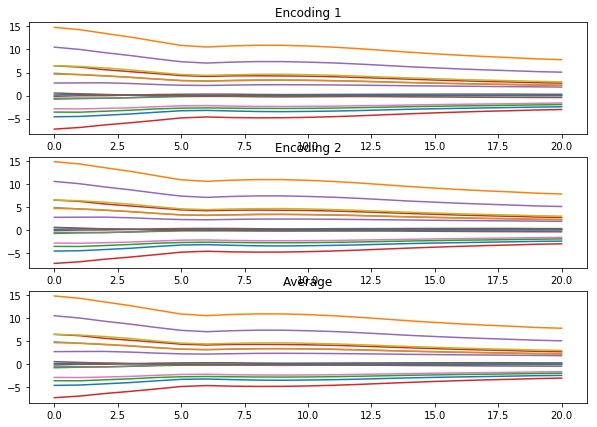

In [10]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(enc_mix[0]);
axs[2].set_title('Average')

In [12]:
fastgen.synthesize(
    enc_mix,
    save_paths=['gen_kik.wav'],
    samples_per_save=sample_length)
synthesis = utils.load_audio('gen_kik.wav',
                             sample_length=sample_length,
                             sr=sr)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: gen_kik.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflow:Sample: 2800
INFO:tensorflow:Sample: 2900
INFO:tensorflow:Sample: 3000
INFO:tensorflow:S

In [49]:
gen_aud, gen_enc = load_encoding('gen_kik.wav', sample_length)

INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Gen Kick')

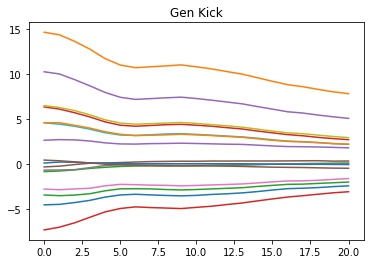

In [50]:
fig, axs = plt.subplots(1, 1)
axs.plot(gen_enc[0]); 
axs.set_title('Gen Kick')

## Rim

In [13]:
aud1, enc1 = load_encoding('808/808rim.wav', sample_length)
aud2, enc2 = load_encoding('909/909rim.wav', sample_length)
enc_mix = (enc1 + enc2) / 2.0

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Average')

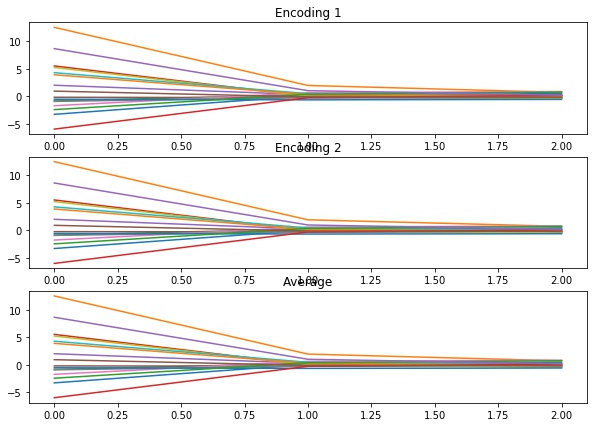

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(enc_mix[0]);
axs[2].set_title('Average')

In [15]:
fastgen.synthesize(
    enc_mix,
    save_paths=['gen_rim.wav'],
    samples_per_save=sample_length)
synthesis = utils.load_audio('gen_rim.wav',
                             sample_length=sample_length,
                             sr=sr)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: gen_rim.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Saving: gen_rim.wav


In [47]:
gen_aud, gen_enc = load_encoding('gen_rim.wav', sample_length)

INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Gen Rim')

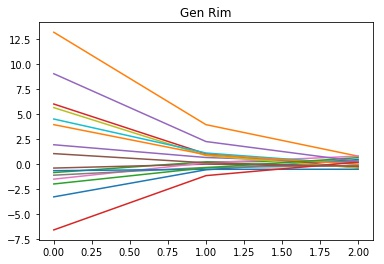

In [48]:
fig, axs = plt.subplots(1, 1)
axs.plot(gen_enc[0]); 
axs.set_title('Gen Rim')

## Clap

In [23]:
sr = 16000
sample_length = 32000
aud1, enc1 = load_encoding('808/808clap.wav', sample_length)
aud2, enc2 = load_encoding('909/909clap.wav', sample_length)
enc_mix = (enc1 + enc2) / 2.0

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Average')

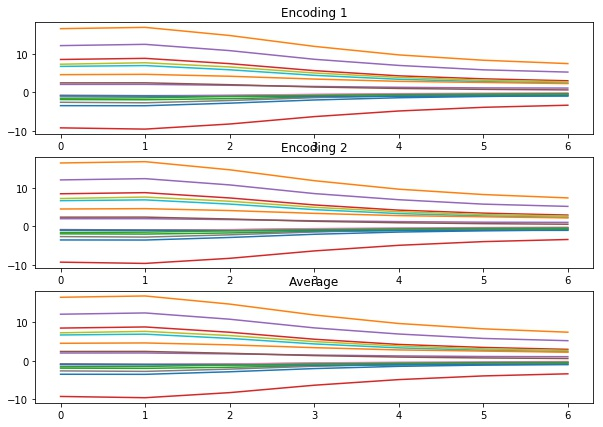

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(enc_mix[0]);
axs[2].set_title('Average')

In [25]:
fastgen.synthesize(
    enc_mix,
    save_paths=['gen_clap.wav'],
    samples_per_save=sample_length)
synthesis = utils.load_audio('gen_clap.wav',
                             sample_length=sample_length,
                             sr=sr)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: gen_clap.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflow:Sample: 2800
INFO:tensorflow:Sample: 2900
INFO:tensorflow:Sample: 3000
INFO:tensorflow:

In [44]:
gen_aud, gen_enc = load_encoding('gen_clap.wav', sample_length)

INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Gen Clap')

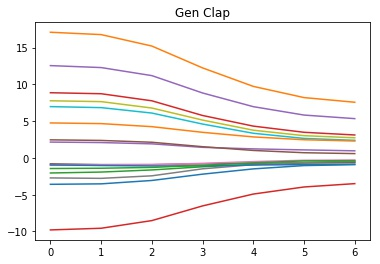

In [45]:
fig, axs = plt.subplots(1, 1)
axs.plot(gen_enc[0]); 
axs.set_title('Gen Clap')

## Open Hi-Hat

In [26]:
aud1, enc1 = load_encoding('808/808openhat.wav', sample_length)
aud2, enc2 = load_encoding('909/909openhat.wav', sample_length)
enc_mix = (enc1 + enc2) / 2.0

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Average')

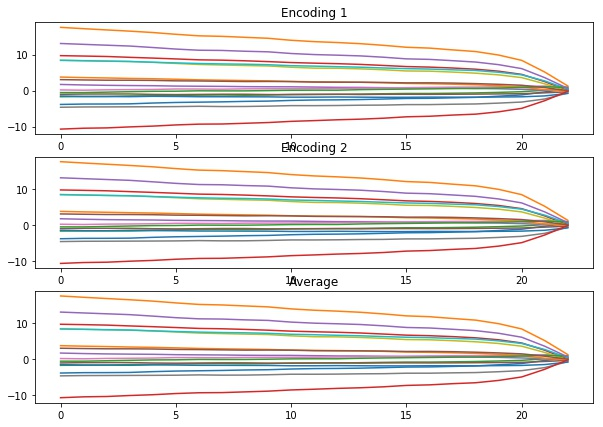

In [27]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(enc_mix[0]);
axs[2].set_title('Average')

In [28]:
fastgen.synthesize(
    enc_mix,
    save_paths=['gen_openhat.wav'],
    samples_per_save=sample_length)
synthesis = utils.load_audio('gen_openhat.wav',
                             sample_length=sample_length,
                             sr=sr)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: gen_openhat.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflow:Sample: 2800
INFO:tensorflow:Sample: 2900
INFO:tensorflow:Sample: 3000
INFO:tensorfl

In [41]:
gen_aud, gen_enc = load_encoding('gen_openhat.wav', sample_length)

INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Gen Open Hat')

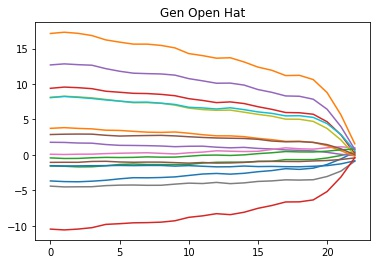

In [43]:
fig, axs = plt.subplots(1, 1)
axs.plot(gen_enc[0]); 
axs.set_title('Gen Open Hat')

## Closed Hi-Hat

In [10]:
aud1, enc1 = load_encoding('808/808closehat.wav', sample_length)
aud2, enc2 = load_encoding('909/909closehat.wav', sample_length)
enc_mix = (enc1 + enc2) / 2.0

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Average')

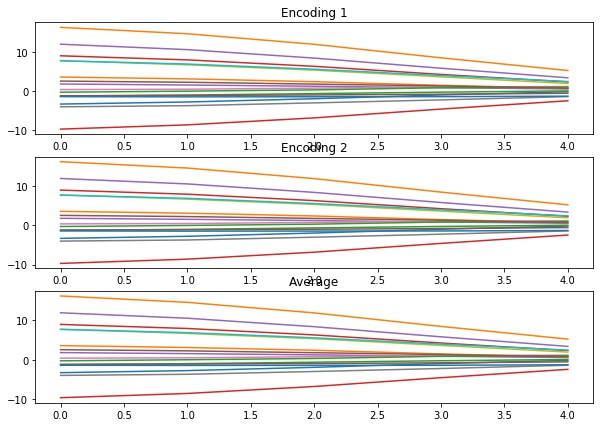

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(enc_mix[0]);
axs[2].set_title('Average')

In [12]:
fastgen.synthesize(
    enc_mix,
    save_paths=['gen_closehat.wav'],
    samples_per_save=sample_length)
synthesis = utils.load_audio('gen_closehat.wav',
                             sample_length=sample_length,
                             sr=sr)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: gen_closehat.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Saving: gen_closehat.wav


In [39]:
gen_aud, gen_enc = load_encoding('gen_closehat.wav', sample_length)

INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Gen Close Hat')

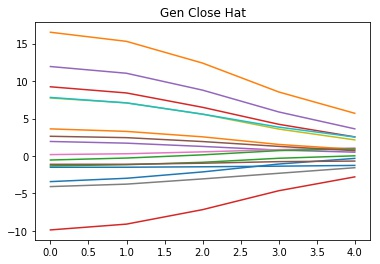

In [40]:
fig, axs = plt.subplots(1, 1)
axs.plot(gen_enc[0]); 
axs.set_title('Gen Close Hat')

## Clav

In [20]:
aud1, enc1 = load_encoding('808/808clav.wav', sample_length)
aud2, enc2 = load_encoding('909/909clav.wav', sample_length)
enc_mix = (enc1 + enc2) / 2.0

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Average')

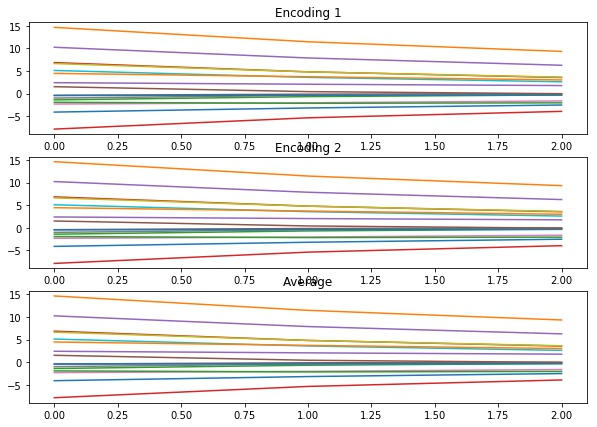

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(enc_mix[0]);
axs[2].set_title('Average')

In [22]:
fastgen.synthesize(
    enc_mix,
    save_paths=['gen_clav.wav'],
    samples_per_save=sample_length)
synthesis = utils.load_audio('gen_clav.wav',
                             sample_length=sample_length,
                             sr=sr)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: gen_clav.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Saving: gen_clav.wav


In [33]:
gen_aud, gen_enc = load_encoding('gen_clav.wav', sample_length)

INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Gen Clav')

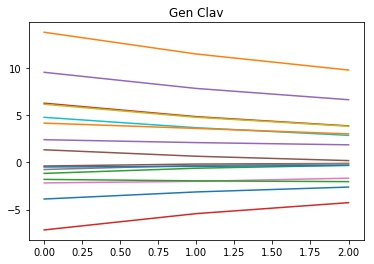

In [36]:
fig, axs = plt.subplots(1, 1)
axs.plot(gen_enc[0]); 
axs.set_title('Gen Clav')

## Cowbell

In [16]:
aud1, enc1 = load_encoding('808/808cowbell.wav', sample_length)
aud2, enc2 = load_encoding('909/909cowbell.wav', sample_length)
enc_mix = (enc1 + enc2) / 2.0

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Average')

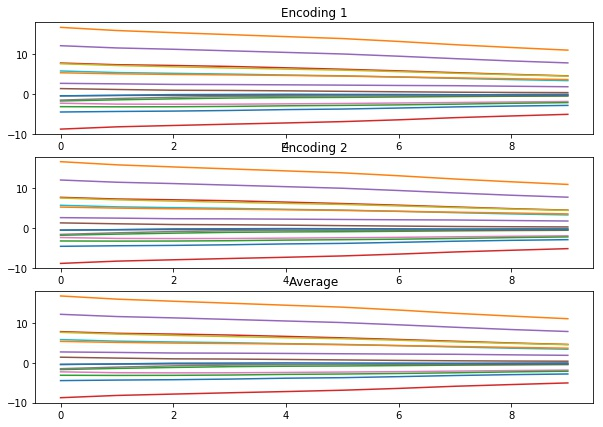

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(enc_mix[0]);
axs[2].set_title('Average')

In [19]:
fastgen.synthesize(
    enc_mix,
    save_paths=['gen_cowbell.wav'],
    samples_per_save=sample_length)
synthesis = utils.load_audio('gen_cowbell.wav',
                             sample_length=sample_length,
                             sr=sr)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: gen_cowbell.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflow:Sample: 2800
INFO:tensorflow:Sample: 2900
INFO:tensorflow:Sample: 3000
INFO:tensorfl

In [37]:
gen_aud, gen_enc = load_encoding('gen_cowbell.wav', sample_length)

INFO:tensorflow:Restoring parameters from model.ckpt-200000


Text(0.5,1,'Gen Cowbell')

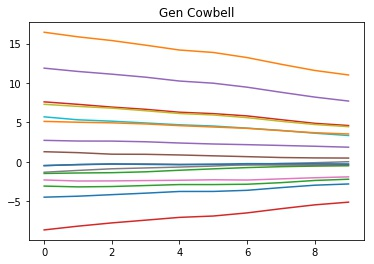

In [38]:
fig, axs = plt.subplots(1, 1)
axs.plot(gen_enc[0]); 
axs.set_title('Gen Cowbell')